This is me following along with the Coursera project analysing countries through confirmed COVID cases and quality of life indicators from the World Happiness Report. I'm following along with most of the basic analysis and steps but I am using the most recent John Hopkins Covid data (up to Nov 8th, not to the end of April like the course does). 

I also am deviating from it in some key ways--first I focus my comparison on 4 big countries from different regions (China, Germany, US, and Brazil). While I am sure there are more targeted comparisions, these 4 countries were selected due to there prevelance in the media about relatively good responses to Covid (China and Germany) and relatively poor responses (US and Brazil).

Course found here: https://www.coursera.org/learn/covid19-data-analysis-using-python 
You can also find the modeled code here and walk through on this blog/site: https://www.thejay.tech/2020/06/covid-19-data-analysis.html 

Goal is simply to practice using Python and Juptyter Notebooks to import, analysis and visualize data. 

In [8]:
#import modules
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

print ("Libraries imported")


Libraries imported


In [37]:
#import datasets
corona_ds_csv = pd.read_csv("/Users/samschmoker/Desktop/Coding/Projects/MasterPython/COVID Data/time_series_covid19_confirmed_global.csv")
world_happiness_ds2019_csv = pd.read_csv("/Users/samschmoker/Desktop/Coding/Projects/MasterPython/COVID Data/World Happiness Report/2019.csv")

#inspect
print (corona_ds_csv.head(10))
corona_ds_csv.shape

                 Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/29/20  \
0        0        0        0        0        0        0  ...     41

(268, 295)

In [18]:
#begin cleaning covid data

#drop the latitute and longitude columns in a new working dataframe
covid_df = corona_ds_csv.drop(["Lat", "Long"], axis=1)

#in new df, combine the country regions so we are just looking at full individual countries
covid_df = covid_df.groupby("Country/Region").sum()

#Print out the dataframe to refer to later: the Head, the # of countries, # of dates, and the correct names for all the countries
print(covid_df.head(10))
countries, dates = covid_df.shape
print ("# of countries: ", countries)
print ("# of recorded dates: ", dates)
pd.set_option("max_rows", None)
print("List of Countries: ", covid_df.iloc[:,0])


                     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Afghanistan                0        0        0        0        0        0   
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
Argentina                  0        0        0        0        0        0   
Armenia                    0        0        0        0        0        0   
Australia                  0        0        0        0        4        5   
Austria                    0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  10/29/20  \
C

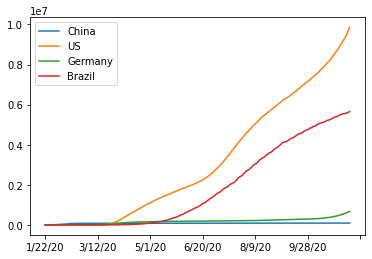

In [19]:
#Quick practice of plotting and comparing countries
covid_df.loc["China"].plot()
covid_df.loc["US"].plot()
covid_df.loc["Germany"].plot()
covid_df.loc["Brazil"].plot()
plt.legend()

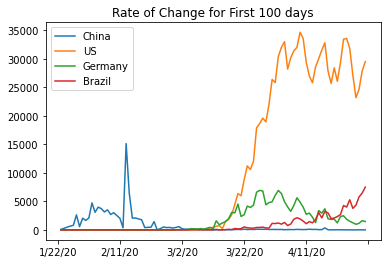

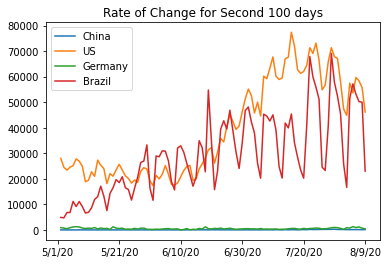

In [22]:
#quick plotting of the first derivative of the same four countries to see rates of change in the first 100 days, and then the second hundred days.

#first 100 days
covid_df.loc["China"][:100].diff().plot()
covid_df.loc["US"][:100].diff().plot()
covid_df.loc["Germany"][:100].diff().plot()
covid_df.loc["Brazil"][:100].diff().plot()
plt.legend()
plt.title("Rate of Change for First 100 days")
plt.show()

#second 100 days
covid_df.loc["China"][100:201].diff().plot()
covid_df.loc["US"][100:201].diff().plot()
covid_df.loc["Germany"][100:201].diff().plot()
covid_df.loc["Brazil"][100:201].diff().plot()
plt.legend()
plt.title("Rate of Change for Second 100 days")
plt.show()


In [23]:
#find max infection rate (first derivative) of each country

china_deriv_max = covid_df.loc["China"].diff().max()
us_deriv_max = covid_df.loc["US"].diff().max()
germany_deriv_max = covid_df.loc["Germany"].diff().max()
brazil_deriv_max = covid_df.loc["Brazil"].diff().max()

print ("These are the max rates of change, in a 24 hour period, for each country.")
print ("China:", china_deriv_max)
print ("US:", us_deriv_max)
print ("Germany:", germany_deriv_max)
print ("Brazil:", brazil_deriv_max)

These are the max rates of change, in a 24 hour period, for each country.
China: 15136.0
US 126742.0
Germany 31480.0
Brazil 69074.0


In [25]:
#create a new column in the df to show the max infection rate of each country

countries = list(covid_df.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_df.loc[c].diff().max())
covid_df["max_infection_rate"] = max_infection_rates
print(covid_df.head(10))

                     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Afghanistan                0        0        0        0        0        0   
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
Argentina                  0        0        0        0        0        0   
Armenia                    0        0        0        0        0        0   
Australia                  0        0        0        0        4        5   
Austria                    0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  10/30/20  \
C

In [26]:
#create new dataframe that omits the specific dates
covid_rates_df = pd.DataFrame(covid_df["max_infection_rate"])

print(covid_rates_df.head(10))

                     max_infection_rate
Country/Region                         
Afghanistan                       915.0
Albania                           495.0
Algeria                           675.0
Andorra                           299.0
Angola                            355.0
Antigua and Barbuda                39.0
Argentina                       18326.0
Armenia                          2476.0
Australia                         716.0
Austria                          8241.0


In [38]:

#inspecting World Happiness 
print(world_happiness_ds2019_csv.columns)
world_happiness_ds2019_csv.shape

#Note: the course wants to drop some "useless" features. I'm keeping them in, because they might be interesting to play around with later



Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


(156, 9)

In [43]:
#Joining the two datasets together

#change the index of World Happiness to the country names, this will make it easier to join the two dataframes.abs
#world_happiness_ds2019_csv.set_index("Country or region", inplace=True)


#joining
covid_and_happiness_df = covid_rates_df.join(world_happiness_ds2019_csv, how="inner")
covid_and_happiness_df.head(10)


,max_infection_rate,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,915.0,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,495.0,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,675.0,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,18326.0,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,2476.0,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064
Australia,716.0,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290
Austria,8241.0,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226
Azerbaijan,1465.0,90,5.208,1.043,1.147,0.769,0.351,0.035,0.182
Bahrain,841.0,37,6.199,1.362,1.368,0.871,0.536,0.255,0.110
Bangladesh,4019.0,125,4.456,0.562,0.928,0.723,0.527,0.166,0.143


In [44]:
#Analyse the joined dataframe

print(covid_and_happiness_df.corr())

                              max_infection_rate  Overall rank     Score  \
max_infection_rate                      1.000000     -0.221444  0.202899   
Overall rank                           -0.221444      1.000000 -0.989127   
Score                                   0.202899     -0.989127  1.000000   
GDP per capita                          0.227957     -0.803665  0.795413   
Social support                          0.163928     -0.776393  0.784094   
Healthy life expectancy                 0.245407     -0.806767  0.801891   
Freedom to make life choices            0.086671     -0.568654  0.585119   
Generosity                             -0.110825     -0.070804  0.097775   
Perceptions of corruption               0.026243     -0.388395  0.419293   

                              GDP per capita  Social support  \
max_infection_rate                  0.227957        0.163928   
Overall rank                       -0.803665       -0.776393   
Score                               0.795413   

Text(0.5, 1.0, 'Relationship Between Covid Infection Rate and GDP per Capita')

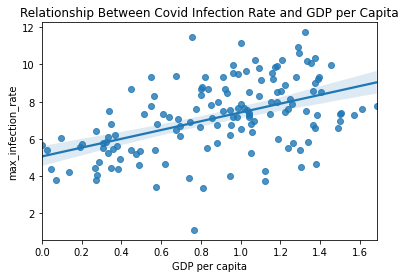

In [45]:
#visualizing the analysis and data

#plot GDP and max infection rates
x = covid_and_happiness_df["GDP per capita"]
y = covid_and_happiness_df["max_infection_rate"]
sns.regplot(x, np.log(y)).set_title("Relationship Between Covid Infection Rate and GDP per Capita")

Text(0.5, 1.0, 'Relationship Between Covid Infection Rate and World Happiness Rank')

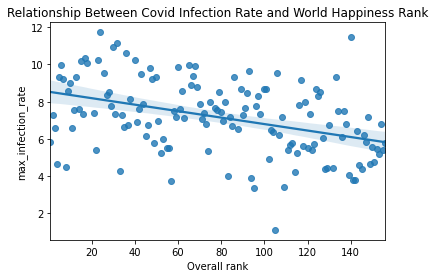

In [46]:
#plot happiness rank to max_covid_rate

x = covid_and_happiness_df["Overall rank"]
y = covid_and_happiness_df["max_infection_rate"]
sns.regplot(x, np.log(y)).set_title("Relationship Between Covid Infection Rate and World Happiness Rank")